<a href="https://colab.research.google.com/github/Aakash007-ai/fall_detection/blob/main/check_2_fall_detection_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import keras
keras.__version__

'2.12.0'

In [4]:
!pip install tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 8.6 MB/s eta 0:00:00


In [5]:
from keras import models
from keras import layers
from keras import metrics
from keras import optimizers

import numpy as np
import json
import os
import csv
import pandas as pd
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:
# !git clone https://github.com/Aakash007-ai/fall_detection.git

In [7]:
#mount drive

In [8]:
# read the video data csv
# it is faster than running the above code each time

#to use drive use this commented section
ur_path = '/content/drive/My Drive/final_project/initial_csv/ur_data.csv'
mc_fall_path = '/content/drive/My Drive/final_project/initial_csv/mc_fall_data.csv'
mc_notfall_path = '/content/drive/My Drive/final_project/initial_csv/mc_notfall_data.csv'
youtube_fall_path = '/content/drive/My Drive/final_project/initial_csv//youtube_fall_data.csv'
youtube_notfall_path = '/content/drive/My Drive/final_project/initial_csv/youtube_notfall_data.csv'

# ur_path = '/content/fall_detection/initial_csv/ur_data.csv'
# mc_fall_path = '/content/fall_detection/initial_csv/mc_fall_data.csv'
# mc_notfall_path = '/content/fall_detection/initial_csv/mc_notfall_data.csv'
# youtube_fall_path = '/content/fall_detection/initial_csv//youtube_fall_data.csv'
# youtube_notfall_path = '/content/fall_detection/initial_csv/youtube_notfall_data.csv'

def read_data(path):
  video_data = []
  with open(path, mode='r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
      video_data.append(row)
  return video_data

ur_data = read_data(ur_path)
mc_fall_data = read_data(mc_fall_path)
mc_notfall_data = read_data(mc_notfall_path)
youtube_fall_data = read_data(youtube_fall_path)
youtube_notfall_data = read_data(youtube_notfall_path)

print(ur_data[0])
print(len(ur_data[0]))
print(mc_fall_data[0])
print(mc_notfall_data[0])
print(youtube_fall_data[0])
print(youtube_notfall_data[0])

['520.972', '128.178', '0.833728', '544.571', '130.782', '0.739747', '540.636', '132.754', '0.726633', '553.086', '154.999', '0.800764', '541.285', '166.155', '0.742877', '549.144', '129.467', '0.745059', '572.703', '155.035', '0.841464', '543.266', '171.369', '0.817947', '572.067', '169.415', '0.607432', '564.874', '166.16', '0.534525', '526.875', '181.191', '0.862423', '554.389', '217.851', '0.612664', '577.962', '170.732', '0.619415', '535.402', '188.398', '0.760066', '560.284', '220.479', '0.65847', '545.882', '232.266', '0.604373', '553.078', '232.915', '0.532739', '566.184', '222.453', '0.655722', '541.939', '229.002', '0.399536', '541.943', '227.687', '0.344383', '560.285', '217.223', '0.153482', 'fall-16-cam0_000000000016_keypoints']
64
['504.171', '238.019', '0.119379', '481.995', '237.979', '0.647555', '471.564', '247.106', '0.6547', '485.918', '299.334', '0.780827', '525.04', '307.158', '0.770417', '495.036', '228.845', '0.474206', '519.863', '220.995', '0.283234', '539.41',

In [9]:
# normalize data according to the size of videos in different dataset
def normalize(list, width, height):
  for record in list:
    for i in range(0, 63, 3):
        record[i] = float(record[i])/ width
        record[i + 1] = float(record[i + 1]) / height

normalize(ur_data, 640, 240)
normalize(mc_fall_data, 720, 480)
normalize(mc_notfall_data, 720, 480)
normalize(youtube_fall_data, 640, 360)
normalize(youtube_notfall_data, 640, 360)


In [10]:
print(ur_data[0])
print(len(ur_data[0]))
print(mc_fall_data[0])
print(mc_notfall_data[0])
print(youtube_fall_data[0])
print(youtube_notfall_data[0])

[0.81401875, 0.534075, '0.833728', 0.8508921875000001, 0.544925, '0.739747', 0.8447437499999999, 0.5531416666666666, '0.726633', 0.864196875, 0.6458291666666667, '0.800764', 0.8457578124999999, 0.6923125, '0.742877', 0.8580375, 0.5394458333333334, '0.745059', 0.8948484375, 0.6459791666666667, '0.841464', 0.848853125, 0.7140375, '0.817947', 0.8938546875, 0.7058958333333333, '0.607432', 0.882615625, 0.6923333333333334, '0.534525', 0.8232421875, 0.7549625, '0.862423', 0.8662328125000001, 0.9077125, '0.612664', 0.903065625, 0.7113833333333334, '0.619415', 0.8365656250000001, 0.7849916666666666, '0.760066', 0.87544375, 0.9186625, '0.65847', 0.8529406249999999, 0.9677749999999999, '0.604373', 0.864184375, 0.9704791666666667, '0.532739', 0.8846624999999999, 0.9268875, '0.655722', 0.8467796875, 0.954175, '0.399536', 0.8467859375, 0.9486958333333334, '0.344383', 0.8754453124999999, 0.9050958333333334, '0.153482', 'fall-16-cam0_000000000016_keypoints']
64
[0.7002375, 0.49587291666666666, '0.1193

In [11]:
# read target label of UR dataset.

target = []
path1 = '/content/drive/My Drive/final_project/target_ur/urfall-cam0-falls.csv'
path2 = '/content/drive/My Drive/final_project/target_ur/urfall-cam0-adls.csv'
# in these csv of UR dataset, 
# '-1' means person is not lying, '1' means person is lying on the ground; '0' is temporary pose, when person "is falling"

def input_fall(path):
  with open(path, mode='r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
      record = []
      record.append(row[0])
      record.append(row[1])
      label = row[2]
      if label == '1' or label == '0':
        record.append(1)        
      else:
        record.append(0)
      # each record: [<video_id>, <frame_id>, label], eg: ['fall-17', '22', 0] 
      target.append(record)

# though laying in the video, but it is not fall, so I mark 0 as label
def input_adl(path):
  with open(path, mode='r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
      record = []
      record.append(row[0])
      record.append(row[1])
      record.append(0)
      target.append(record)

input_fall(path1)
print("falls of UR dataset", len(target))

input_adl(path2)

df = pd.DataFrame.from_records(target)
df.to_csv (r'/content/drive/My Drive/final_project/target/target_data.csv', index = False, header=False) #target_data.csv


falls of UR dataset 2995


In [12]:
# make dictionary of target of ur dataset
target_csv_path = '/content/drive/My Drive/final_project/target/target_data.csv'
idx = 0
idx_dict = {}

with open(target_csv_path, mode='r') as csv_file:
  reader = csv.reader(csv_file)
  for row in reader:
    # each row: [<video_id>, <frame_id>, label], eg: ['fall-17', '22', 0] 
    idx_dict['.'.join(row[:2])] = idx  # {'fall-17.22' : 112}
    idx += 1

In [13]:
# match body landmark data with label data of ur dataset
bodylandmark = []
label = []
frame_name = []

for landmark in ur_data:
  video_name = landmark[-1].split('_')  # 'fall-01-cam0_000000000004'
  a = video_name[0].split('-')
  video_type = a[0] # 'fall'
  video_id = a[1]   # '01'
  frame_id = str(int(video_name[1])) # '000000000004' become '4'
  try:
    a = '.'.join([video_id, frame_id])
    b = '-'.join([video_type, a])
    label.append(target[idx_dict[b]][-1])
    bl = landmark[:-1]
    # convert string into float
    bl = list(map(float,bl))
    bodylandmark.append(bl)
    frameName = landmark[-1]
    frame_name.append(frameName)
  except:
    continue

print("bodylandmark record sample of ur dataset:" )
print(bodylandmark[0])
print("label of ur dataset: ", len(label))
print("bodylandmark of ur dataset: ", len(bodylandmark))
print(frame_name[0])

bodylandmark record sample of ur dataset:
[0.81401875, 0.534075, 0.833728, 0.8508921875000001, 0.544925, 0.739747, 0.8447437499999999, 0.5531416666666666, 0.726633, 0.864196875, 0.6458291666666667, 0.800764, 0.8457578124999999, 0.6923125, 0.742877, 0.8580375, 0.5394458333333334, 0.745059, 0.8948484375, 0.6459791666666667, 0.841464, 0.848853125, 0.7140375, 0.817947, 0.8938546875, 0.7058958333333333, 0.607432, 0.882615625, 0.6923333333333334, 0.534525, 0.8232421875, 0.7549625, 0.862423, 0.8662328125000001, 0.9077125, 0.612664, 0.903065625, 0.7113833333333334, 0.619415, 0.8365656250000001, 0.7849916666666666, 0.760066, 0.87544375, 0.9186625, 0.65847, 0.8529406249999999, 0.9677749999999999, 0.604373, 0.864184375, 0.9704791666666667, 0.532739, 0.8846624999999999, 0.9268875, 0.655722, 0.8467796875, 0.954175, 0.399536, 0.8467859375, 0.9486958333333334, 0.344383, 0.8754453124999999, 0.9050958333333334, 0.153482]
label of ur dataset:  11475
bodylandmark of ur dataset:  11475
fall-16-cam0_000000

In [14]:
# add data of MC dataset to the whole dataset
# For MC dataset, all frames in fall data should be label 1, 
# and all frames in notfall data should be label 0.
for record in mc_fall_data:
  bl = record[:-1]
  bl = list(map(float,bl))
  bodylandmark.append(bl)
  label.append(1)
  frameName = record[-1]
  frame_name.append(frameName)

for record in mc_notfall_data:
  bl = record[:-1]
  bl = list(map(float,bl))
  bodylandmark.append(bl)
  label.append(0)
  frameName = record[-1]
  frame_name.append(frameName)


In [15]:
# add data of youtube dataset to the whole dataset
# For youtube dataset, all frames in fall data should be label 1, 
# and all frames in notfall data should be label 0.
for record in youtube_fall_data:
  bl = record[:-1]
  bl = list(map(float,bl))
  bodylandmark.append(bl)
  label.append(1)
  frameName = record[-1]
  frame_name.append(frameName)

for record in youtube_notfall_data:
  bl = record[:-1]
  bl = list(map(float,bl))
  bodylandmark.append(bl)
  label.append(0)
  frameName = record[-1]
  frame_name.append(frameName)


In [16]:
# make bodylandmark and label to be a same data frame
all_data = []

for i in range(len(bodylandmark)):
  all_data.append([label[i]])
  all_data[i] = all_data[i] + bodylandmark[i]

print(all_data[0])
print(len(all_data))
print(len(all_data[0]))

[0, 0.81401875, 0.534075, 0.833728, 0.8508921875000001, 0.544925, 0.739747, 0.8447437499999999, 0.5531416666666666, 0.726633, 0.864196875, 0.6458291666666667, 0.800764, 0.8457578124999999, 0.6923125, 0.742877, 0.8580375, 0.5394458333333334, 0.745059, 0.8948484375, 0.6459791666666667, 0.841464, 0.848853125, 0.7140375, 0.817947, 0.8938546875, 0.7058958333333333, 0.607432, 0.882615625, 0.6923333333333334, 0.534525, 0.8232421875, 0.7549625, 0.862423, 0.8662328125000001, 0.9077125, 0.612664, 0.903065625, 0.7113833333333334, 0.619415, 0.8365656250000001, 0.7849916666666666, 0.760066, 0.87544375, 0.9186625, 0.65847, 0.8529406249999999, 0.9677749999999999, 0.604373, 0.864184375, 0.9704791666666667, 0.532739, 0.8846624999999999, 0.9268875, 0.655722, 0.8467796875, 0.954175, 0.399536, 0.8467859375, 0.9486958333333334, 0.344383, 0.8754453124999999, 0.9050958333333334, 0.153482]
35279
64


In [17]:
# know the majority and minority
fall = label.count(1)
not_fall = label.count(0)
print(fall)
print(not_fall)

13128
22151


In [18]:
# up-sampling to make the data balance
# Separate majority and minority classes
df = pd.DataFrame.from_records(all_data)
header = ['label']
for i in range(63):
  header.append(i)

df.columns = header
df_majority = df[df.label==0]
df_minority = df[df.label==1]
print("before re-sampling, not fall vs fall: ")
print(df['label'].value_counts())

from sklearn.utils import resample
print("begin to re sample...")
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=not_fall)    # to match majority class
                                  
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
print("after re-sampling...")
# Display new class counts
df_upsampled.label.value_counts()

before re-sampling, not fall vs fall: 
0    22151
1    13128
Name: label, dtype: int64
begin to re sample...
after re-sampling...


0    22151
1    22151
Name: label, dtype: int64

In [19]:
all_data = df_upsampled.values

print(all_data[0])
print(len(all_data[0]))
print("number of all data:", len(all_data))

[0.         0.81401875 0.534075   0.833728   0.85089219 0.544925
 0.739747   0.84474375 0.55314167 0.726633   0.86419687 0.64582917
 0.800764   0.84575781 0.6923125  0.742877   0.8580375  0.53944583
 0.745059   0.89484844 0.64597917 0.841464   0.84885312 0.7140375
 0.817947   0.89385469 0.70589583 0.607432   0.88261563 0.69233333
 0.534525   0.82324219 0.7549625  0.862423   0.86623281 0.9077125
 0.612664   0.90306562 0.71138333 0.619415   0.83656563 0.78499167
 0.760066   0.87544375 0.9186625  0.65847    0.85294062 0.967775
 0.604373   0.86418438 0.97047917 0.532739   0.8846625  0.9268875
 0.655722   0.84677969 0.954175   0.399536   0.84678594 0.94869583
 0.344383   0.87544531 0.90509583 0.153482  ]
64
number of all data: 44302


In [20]:
# split data into train and test set
np.random.shuffle(all_data)
split_point = len(all_data) // 9
print("split point:", split_point)
test_data = all_data[:split_point]
train_data = all_data[split_point: ]

print("number of test data:", len(test_data))
print("number of train data:",len(train_data))

print(train_data[0])

split point: 4922
number of test data: 4922
number of train data: 39380
[1.         0.74015417 0.45234167 0.0805455  0.7039125  0.43873333
 0.24118    0.71477361 0.42243542 0.265461   0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.58790417 0.42231667 0.356718   0.58610417 0.41968333
 0.217735   0.50998472 0.42515417 0.140081   0.44296389 0.46875208
 0.0604429  0.58067639 0.41426667 0.431536   0.49543611 0.4170125
 0.712621   0.44103889 0.46861458 0.806859   0.41388333 0.44681458
 0.670624   0.41398056 0.455075   0.641098   0.43745139 0.48497917
 0.649837   0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [21]:
print(len(train_data))
print(len(train_data[0]))

# new_data = train_data[:,:4]+train_data[:,7:25]

39380
64


#grouping_important_features

In [22]:
first = train_data[:,:4]
len(first[0])
print(first.shape)

(39380, 4)


In [23]:
second = train_data[:,7:25]
len(second[0])

18

In [24]:
third = train_data[:,28:49]
len(third[0])

21

In [25]:
fourth = train_data[:,52:58]
len(fourth[0])

6

In [26]:
fifth = train_data[:,61:64]
len(fifth[0])

3

In [27]:
import numpy as np

# assume train_data is your 2D list of size (39380,64)
selected_cols = np.concatenate((train_data[:, :4], train_data[:, 7:25], train_data[:, 28:49], train_data[:, 52:58], train_data[:, 61:64]), axis=1)


In [28]:
# # assume train_data is your 2D list of size (39380,64)
# selected_cols = train_data[:, :4] + train_data[:, 7:25] + train_data[:, 28:49] + train_data[:, 52:58] + train_data[:, 61:64]

In [29]:
# train_data = []
# train_data = [row1+row2 for row1,row2 in zip(first,second) ]

In [30]:
# # concatenate the two lists
# train_data = []
# concatenated_list = []
# for i in range(len(first)):
#     train_data.append(first[i] + second[i] + third[i] + fourth[i] + fifth[i])

# # print the concatenated list
# print(len(train_data))
# print(len(train_data[0]))

In [31]:
print(len(selected_cols))
print(len(selected_cols[0]))

39380
52


In [32]:
# train_data = first + second +third +fourth +fifth`
# print(len(train_data[0]))
# print(len(train_data))
# train_data

In [33]:
train_data = []
train_data = selected_cols

In [34]:
print(len(train_data[0]))
print(len(train_data))

52
39380


In [35]:
# solution 1: train model using lstm
from tensorflow.keras.layers import LSTM
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from numpy import array
from tensorflow.keras.models import Sequential

def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * np.exp(0.1 * (10 - epoch))
  
x_train = []
y_train = []

for record in train_data:
  x_train.append(record[1:]) # [x,63] size x is 39380
  label = int(record[0])
  y_train.append(label) 

def train_lstm_model(x_train, y_train):
  x_train = array(x_train)
  x_train = x_train.reshape((len(x_train), 1, len(x_train[0])))
  print("x_train.shape", x_train.shape)
  print(x_train[0])

  y_train = array(y_train)
  print("y_train.shape", y_train.shape)

  # imrpove log: use batch size 16 and add one more lstm layer

  lstm_model = Sequential()
  lstm_model.add(LSTM(16, 
                input_shape=(1, 51),#62
                return_sequences=True))
  lstm_model.add(LSTM(16, ))
  lstm_model.add(layers.Dense(1, activation='sigmoid'))
  lstm_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc',
                        metrics.AUC(), 
                        metrics.FalseNegatives(),
                        metrics.Recall(),
                        metrics.Precision(),
                        metrics.FalseNegatives(),
                        metrics.TrueNegatives(),
                        metrics.FalsePositives(),
                        metrics.TruePositives()])
  lstm_history = lstm_model.fit(x_train, y_train,
                      epochs=100,
                      batch_size=16,
                      validation_split=0.2,
                      callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5),
                      callbacks.LearningRateScheduler(scheduler)])
  print("finish training lstm model")
  return lstm_model, lstm_history

lstm_model, lstm_history = train_lstm_model(x_train, y_train)

x_train.shape (39380, 1, 51)
[[0.74015417 0.45234167 0.0805455  0.71477361 0.42243542 0.265461
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.58610417 0.41968333 0.217735
  0.50998472 0.42515417 0.140081   0.44296389 0.46875208 0.0604429
  0.58067639 0.41426667 0.431536   0.49543611 0.4170125  0.712621
  0.44103889 0.46861458 0.806859   0.41388333 0.44681458 0.670624
  0.43745139 0.48497917 0.649837   0.         0.         0.
  0.         0.         0.        ]]
y_train.shape (39380,)
Epoch 1/100
1969/1969 [==============================] - 32s 8ms/step - loss: 0.4269 - acc: 0.7991 - auc: 0.8822 - false_negatives: 2474.0000 - recall: 0.8422 - precision: 0.7740 - false_negatives_1: 2474.0000 - true_negatives: 11974.0000 - false_positives: 3854.0000 - true_positives: 13202.0000 - val_loss: 0.3386 - val_acc: 0.8490 - val_auc: 0.9326 - val_false_negatives: 280.0000 - val_recall: 0.

In [36]:
lstm_model.summary()
lstm_model.save("/content/drive/My Drive/final_project/lstm_model.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 16)             4352      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 6,481
Trainable params: 6,481
Non-trainable params: 0
_________________________________________________________________


In [37]:
# plotting the results

import matplotlib.pyplot as plt

def plotting_training(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  # Plot training & validation loss values
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.figure()
  plt.plot(epochs, loss, 'bo', label="Training loss")
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('epoch', fontsize=10)
  plt.ylabel('loss', fontsize=10)
  plt.ylim(0.0,0.5)
  plt.legend()
  plt.show()

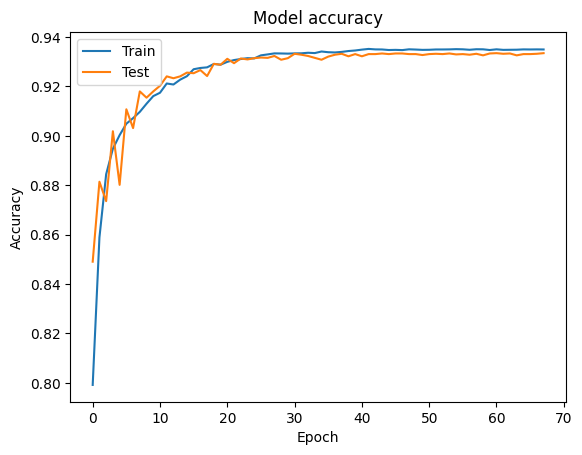

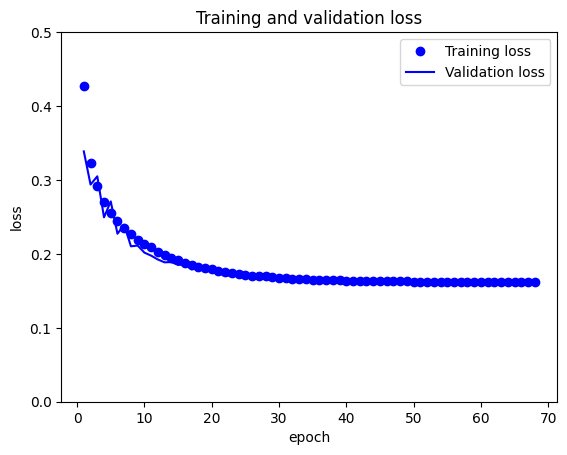

In [38]:
plotting_training(lstm_history)

In [39]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime


In [40]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)

In [47]:
# history = lstm_model.fit(array(x_train), array(y_train), epochs=100, batch_size=16, validation_split=0.2,callbacks=[tensorboard_callback])

In [46]:
%tensorboard --logdir logs/fit
notebook.display(port=6006, height=1000)


UsageError: Line magic function `%tensorboard` not found.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# test 
# for lstm
x_test = []
y_test = []

for record in train_data:
  x_test.append(record[1:])
  label = int(record[0])
  y_test.append(label) 

x_test = array(x_test)
x_test = x_test.reshape((len(x_test), 1, len(x_test[0])))

y_test = array(y_test)

test_score = lstm_model.evaluate(x_test, y_test)
print(test_score)

In [ ]:
# solution 2: train model using CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * np.exp(0.1 * (10 - epoch))

x_train = []
y_train = []

for record in train_data:
  x_train.append(record[1:])
  label = int(record[0])
  y_train.append(label) 

def train_cnn_model(x_train, y_train):
  x_train = array(x_train)
  x_train = x_train.reshape((len(x_train), 3, int(len(x_train[0])/3), 1))

  y_train = array(y_train)

  #create model
  cnn_model = Sequential()
  cnn_model.add(Conv2D(64, 
                  kernel_size=3, 
                  activation='relu', 
                  input_shape=(3,17,1), #3,21,1
                  padding='same'))
  cnn_model.add(layers.BatchNormalization(1))
  cnn_model.add(Conv2D(64, 
                  kernel_size=3, 
                  activation='relu', 
                  padding='same'))
  cnn_model.add(layers.BatchNormalization(1))
  cnn_model.add(MaxPooling2D(2,2))
  cnn_model.add(Flatten())
  cnn_model.add(Dense(512, activation = 'relu')) 
  cnn_model.add(Dense(1, activation='sigmoid'))

  # compile and fit
  cnn_model.compile(optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['acc', 
                        metrics.AUC(), 
                        metrics.FalseNegatives(),
                        metrics.Recall(),
                        metrics.Precision(),
                        metrics.FalseNegatives(),
                        metrics.TrueNegatives(),
                        metrics.FalsePositives(),
                        metrics.TruePositives()])
  cnn_history = cnn_model.fit(x_train, y_train,
                      epochs=100,
                      batch_size=16,
                      validation_split=0.2,
                      callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5),
                      callbacks.LearningRateScheduler(scheduler)])
    
  print("finish training cnn model")
  return cnn_model, cnn_history


cnn_model, cnn_history = train_cnn_model(x_train, y_train)

In [ ]:
cnn_model.summary()
cnn_model.save("/content/drive/My Drive/final_project/cnn_model.h5")

In [ ]:
plotting_training(cnn_history)

In [ ]:
# test
# for cnn 2d
x_test = []
y_test = []

for record in train_data:
  x_test.append(record[1:])
  label = int(record[0])
  y_test.append(label) 

x_test = array(x_test)
x_test = x_test.reshape((len(x_test), 3, int(len(x_test[0])/3), 1))

y_test = array(y_test)

test_score = cnn_model.evaluate(x_test, y_test)
print(test_score)